In [94]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
for col in df.columns:
    series = df[col]
    n = series.shape[0]
    undefined = series.isna().sum()
    print(f"Col undefined = {undefined/n*100:.2f}")
    


Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00
Col undefined = 0.00


mean radius                   Axes(0.125,0.11;0.0209459x0.77)
mean texture               Axes(0.150135,0.11;0.0209459x0.77)
mean perimeter              Axes(0.17527,0.11;0.0209459x0.77)
mean area                  Axes(0.200405,0.11;0.0209459x0.77)
mean smoothness            Axes(0.225541,0.11;0.0209459x0.77)
mean compactness           Axes(0.250676,0.11;0.0209459x0.77)
mean concavity             Axes(0.275811,0.11;0.0209459x0.77)
mean concave points        Axes(0.300946,0.11;0.0209459x0.77)
mean symmetry              Axes(0.326081,0.11;0.0209459x0.77)
mean fractal dimension     Axes(0.351216,0.11;0.0209459x0.77)
radius error               Axes(0.376351,0.11;0.0209459x0.77)
texture error              Axes(0.401486,0.11;0.0209459x0.77)
perimeter error            Axes(0.426622,0.11;0.0209459x0.77)
area error                 Axes(0.451757,0.11;0.0209459x0.77)
smoothness error           Axes(0.476892,0.11;0.0209459x0.77)
compactness error          Axes(0.502027,0.11;0.0209459x0.77)
concavit

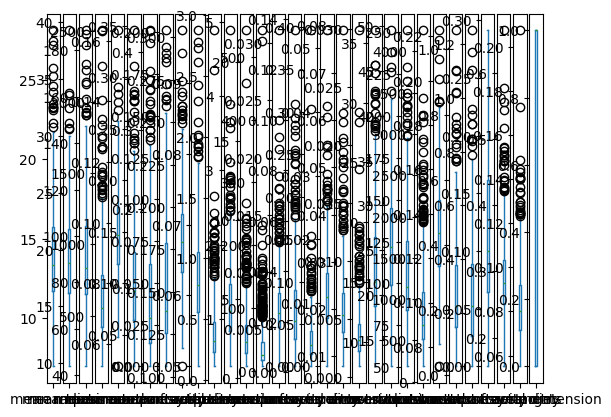

In [ ]:
df.plot(kind='box',subplots=True)

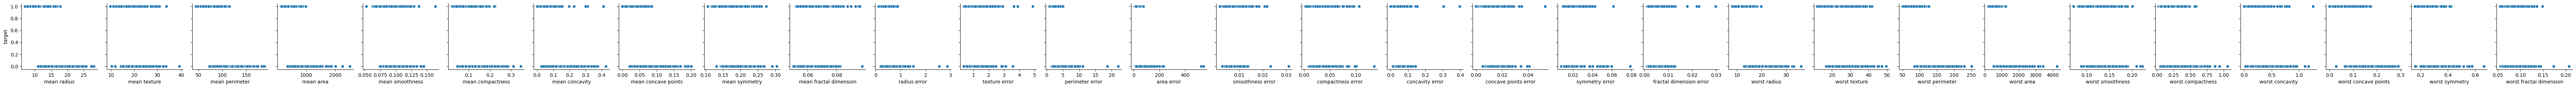

In [ ]:
cols = df.columns
features = [c for c in cols if c !='target']

sns.pairplot(data=df, x_vars=features, y_vars=['target'])

In [ ]:
#split into train test split 

train_X, test_X, train_Y, test_Y = train_test_split(df[features],df['target'],test_size=0.2,random_state=42)

In [ ]:
#quickly windorize the data 

train_data = pd.merge(train_X, train_Y, left_index=True, right_index=True)

win_train = train_data[((np.abs((train_data-train_data.mean())/train_data.std()))<20).all(axis=1)]

win_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [ ]:
##logistic regression first off

#singular matrix issue here:


winX = win_train[features]
winY = win_train['target']



<Axes: >

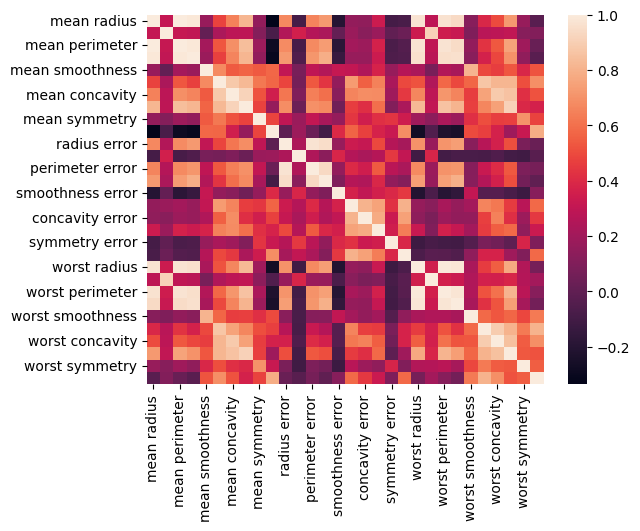

In [ ]:
corr_matrix = winX.corr()
sns.heatmap(corr_matrix)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
downselectX = selector.fit_transform(winX, winY)
print("Selected features:", winX.columns[selector.get_support()].tolist())

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [ ]:
logit_model = sm.Logit(endog=winY, exog=downselectX).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.111503
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.8310
Time:                        12:22:33   Log-Likelihood:                -50.734
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                1.004e-101
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4762      3.528      0.135      0.893      -6.439       7.391
x2             0.2483      0.420      0.591      0.555      -0.575       1.072
x3            -0.0061      0.023     -0.265      0.791      -0.051       0.039
x4            16.9495     12.966      1.307      0.191      -8.463      42.362
x5          -108.5260     41.815     -2.595      0.009    -190.481     -26.571
x6            -0.3013      1.949     -0.155      0.877      -4.121       3.519
x7             0.0112      0.108      0.103      0.918      -0.201       0.224
x8            -0.0194      0.019     -1.030      0.303      -0.056       0.018
x9            -6.3909      4.239     -1.507      0.132     -14.700       1.918
x10           -3.8241     18.374     -0.208      0.835     -39.836      32.188
==============================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
modified_test_X = selector.transform(test_X)
preds = logit_model.predict(modified_test_X)
preds = [1 if p>0.5 else 0 for p in preds]
 incorrect = np.sum(np.abs(preds-test_Y))
print("X"*100)
print(f"Accuracy = {(1-(incorrect/len(preds)))*100:.2f}")
print("X"*100)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy = 98.25
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [ ]:
scaler = StandardScaler()

scaled_train_X = pd.DataFrame(scaler.fit_transform(winX), columns=features)

scaled_test_X = pd.DataFrame(scaler.transform(test_X), columns=features)



In [ ]:


for k in range(1,100,5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X=scaled_train_X,y=winY)
    preds = clf.predict(scaled_test_X)
    incorrect = np.sum(np.abs(preds-test_Y))
    print("X"*100)
    print(f"Accuracy for K={k}")
    print(f"Accuracy = {(1-(incorrect/len(preds)))*100:.2f}")
    print("X"*100)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy for K=1
Accuracy = 93.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy for K=6
Accuracy = 95.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy for K=11
Accuracy = 95.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy for K=16
Accuracy = 95.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
#now doing the random forrest classifier


for trees in range(1,100):
    rfc = RandomForestClassifier(n_estimators=trees)
    rfc.fit(X=scaled_train_X, y=winY)
    preds = rfc.predict(scaled_test_X)
    incorrect = np.sum(np.abs(preds-test_Y))
    print("X"*100)
    print(f"for {trees} number of trees")
    print(f"Accuracy = {(1-(incorrect/len(preds)))*100:.2f}")
    print("X"*100)



XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
for 1 number of trees
Accuracy = 97.37
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
for 2 number of trees
Accuracy = 93.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
for 3 number of trees
Accuracy = 93.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
for 4 number of trees
Accuracy = 92.11
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
xgb = XGBClassifier()
xgb.fit(X=scaled_train_X, y=winY)
preds = rfc.predict(scaled_test_X)
incorrect = np.sum(np.abs(preds-test_Y))
print("X"*100)
print(f"Accuracy = {(1-(incorrect/len(preds)))*100:.2f}")
print("X"*100)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy = 96.49
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
